In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df.shape

(1338, 7)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

1


In [48]:
df = df.drop_duplicates()

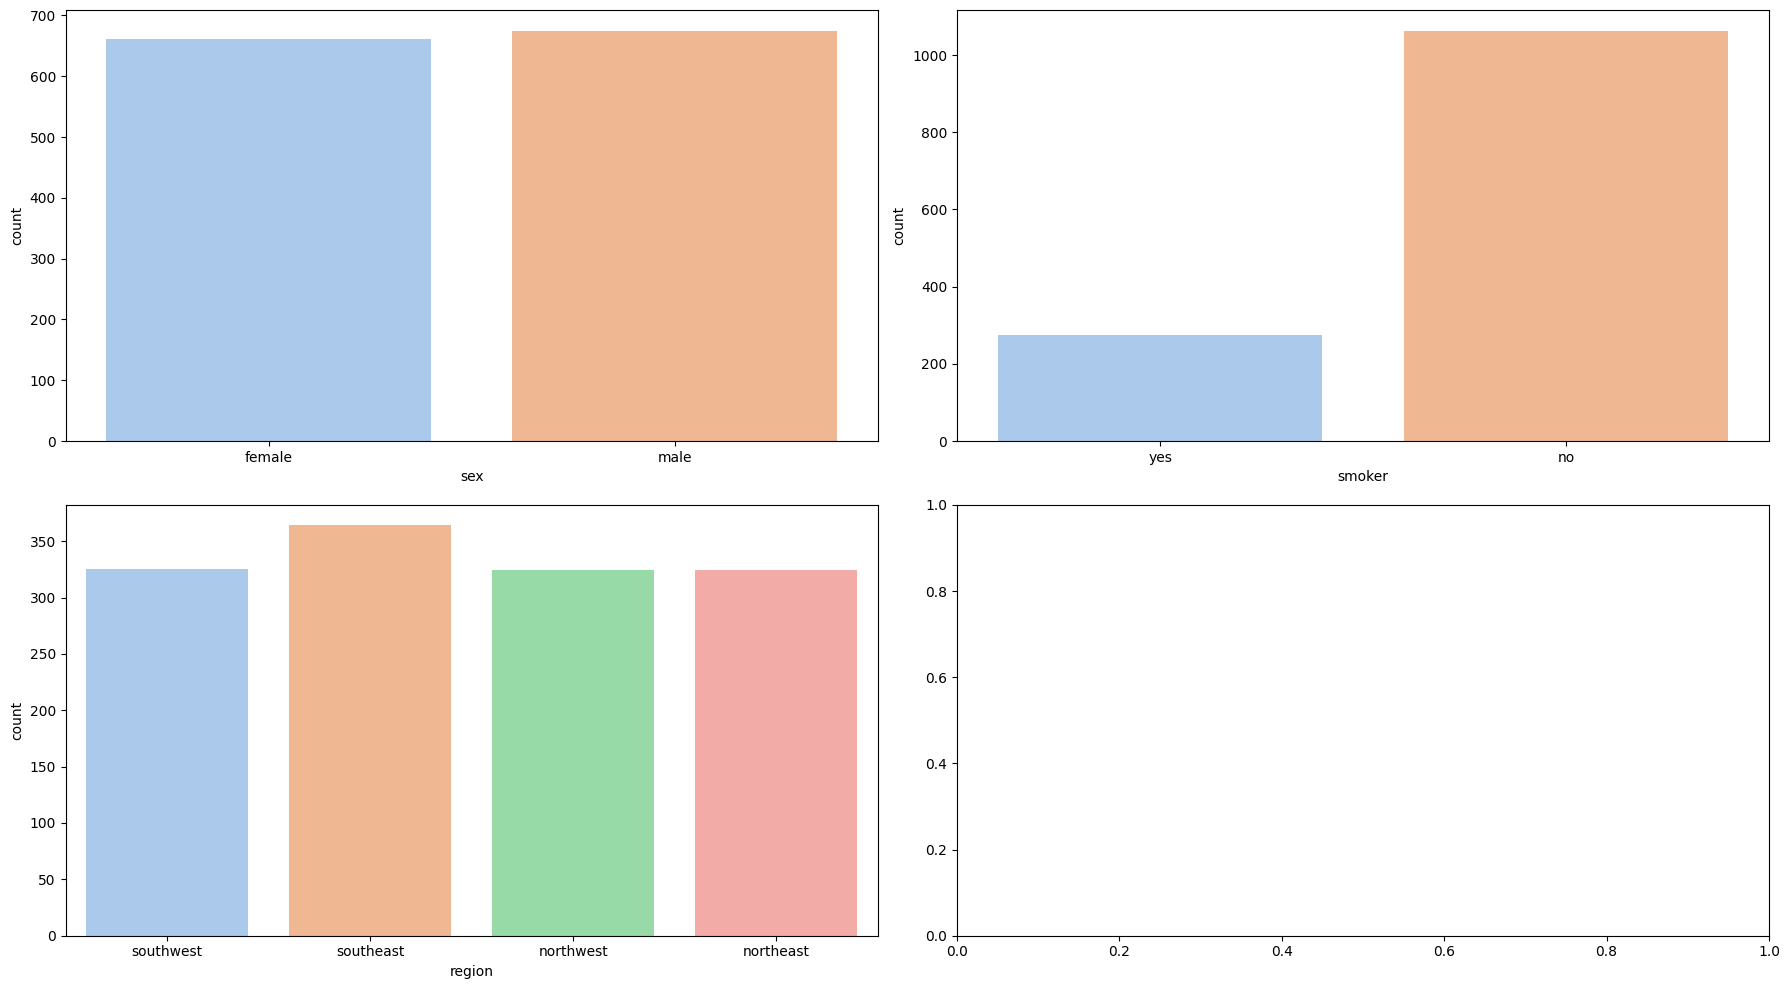

In [49]:
#VARIABLES UNIVARIADAS

fig, axis = plt.subplots(2, 2, figsize = (18, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "region", palette='pastel', hue= "region", legend=False)


plt.tight_layout()

plt.show()

Vemos como los gráficos están bastante igualados en la región y el sexo mientras que observamos una clara diferencia entre fumadores y no fumadores.

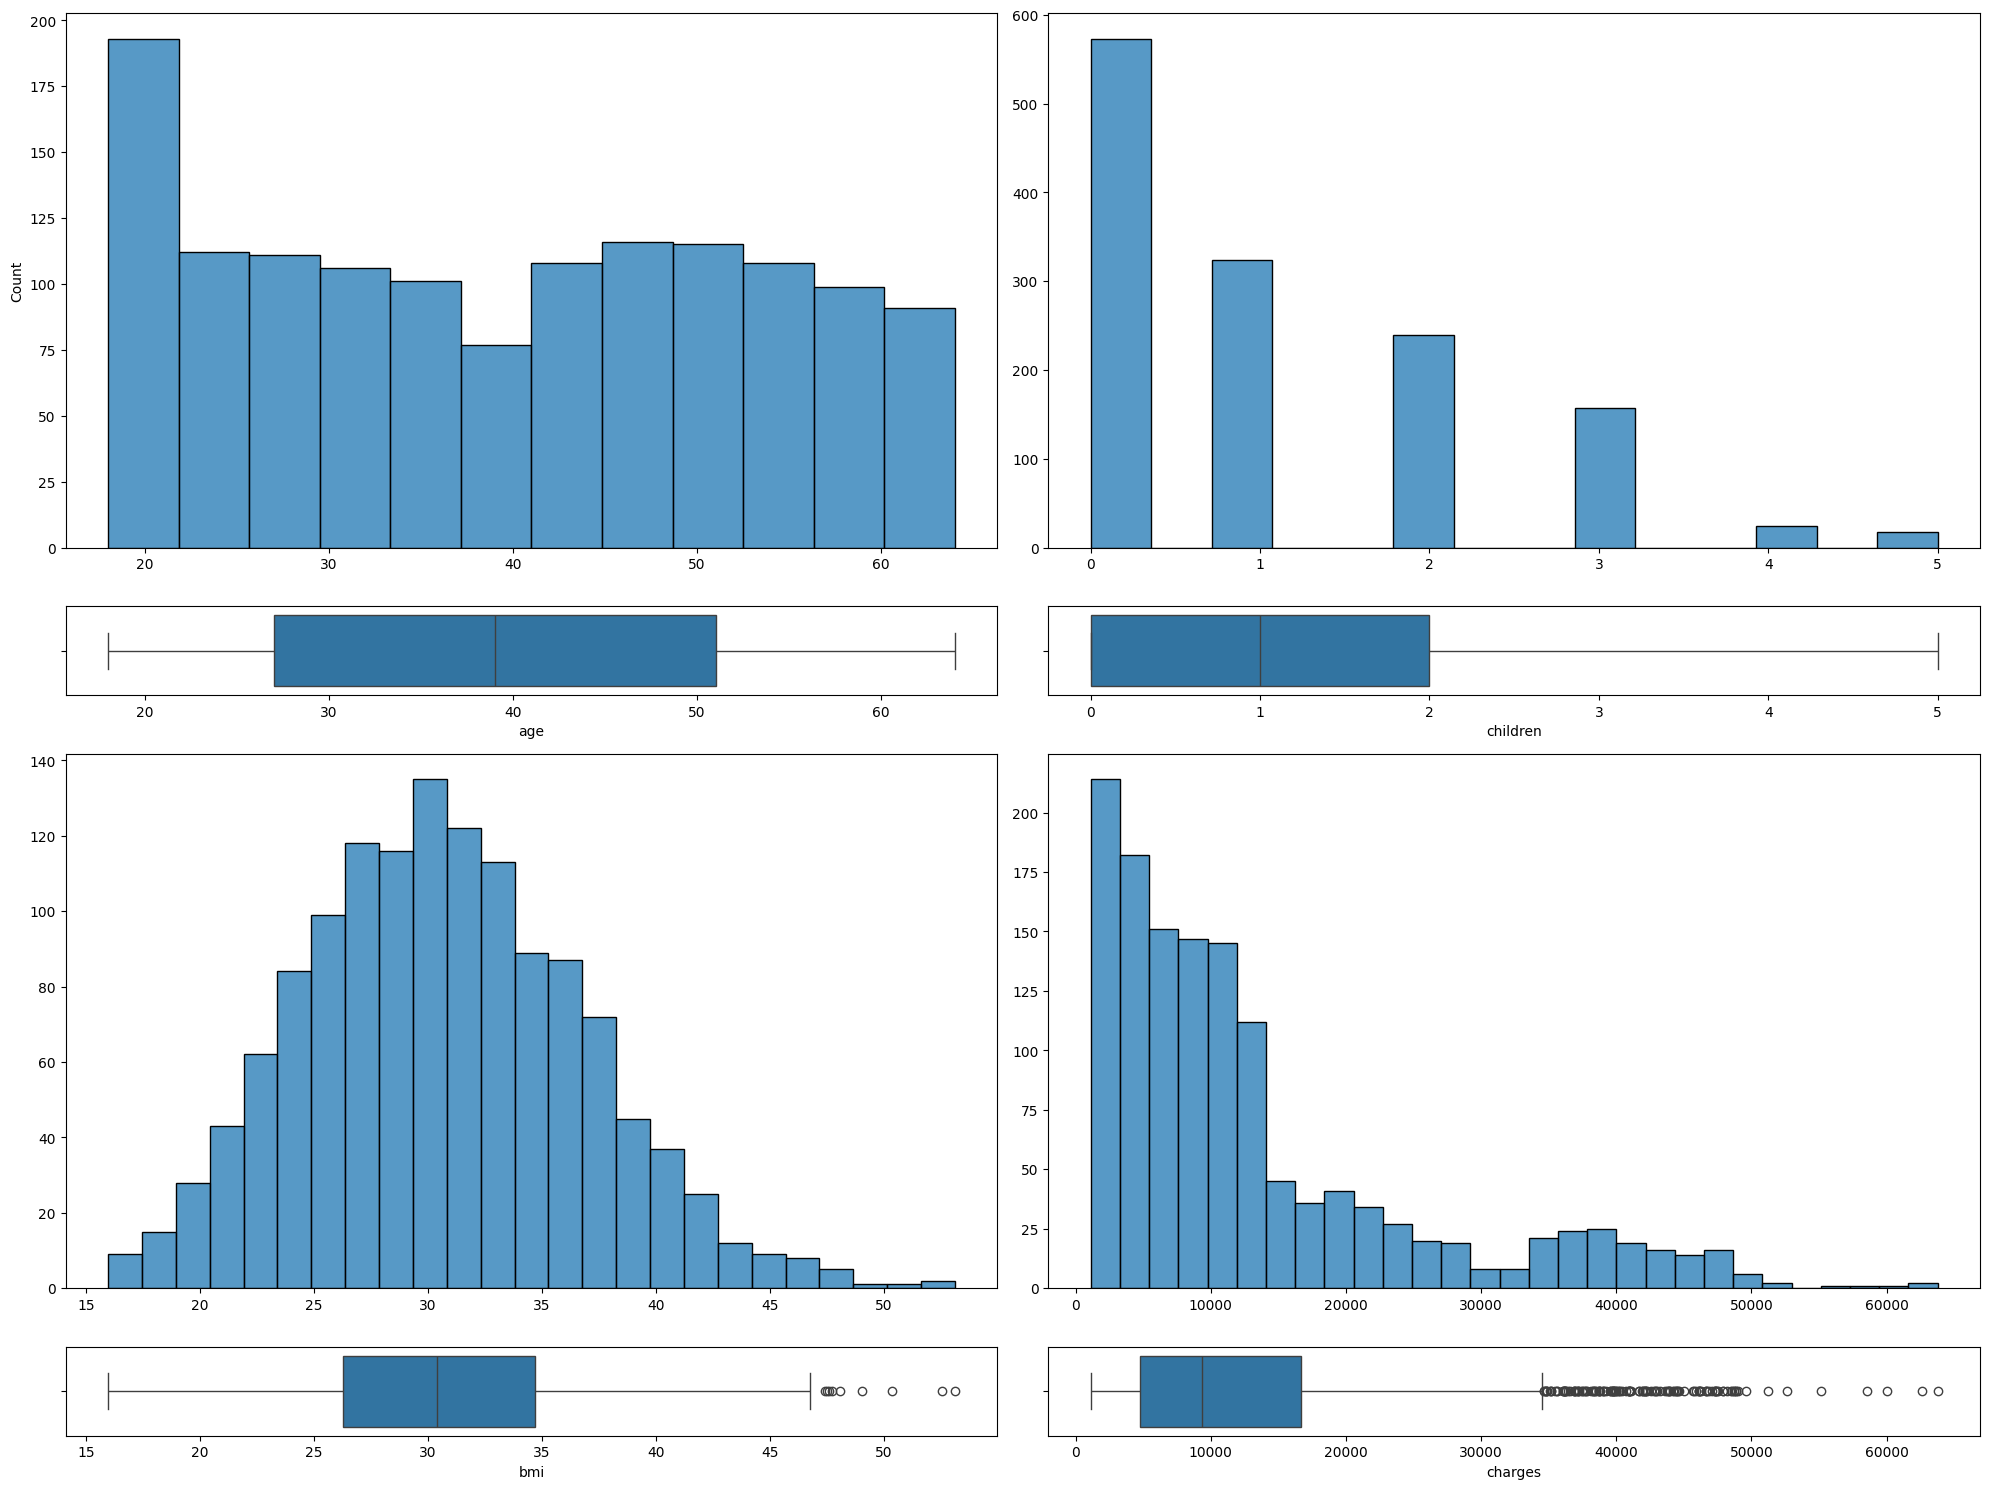

In [50]:
fig, axis = plt.subplots(4, 2, figsize = (20, 15), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "children")

sns.histplot(ax = axis[2, 0], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "bmi")

sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")


plt.tight_layout()

plt.show()

La gráfica de edad está distribuida bastante equitativamente destacando el pico en los 20 años, en cuanto a la gráfica del bmi tendría una forma bastante parecida a la distribución normal con algunos valores atípicos a la derecha. En la de los niños que cuando va aumentando el numero de hijos va disminuyendo la frecuencia y por último las primas de seguros tienen una forma asimétrica con bastantes valores atípicos en la derecha del gráfico.

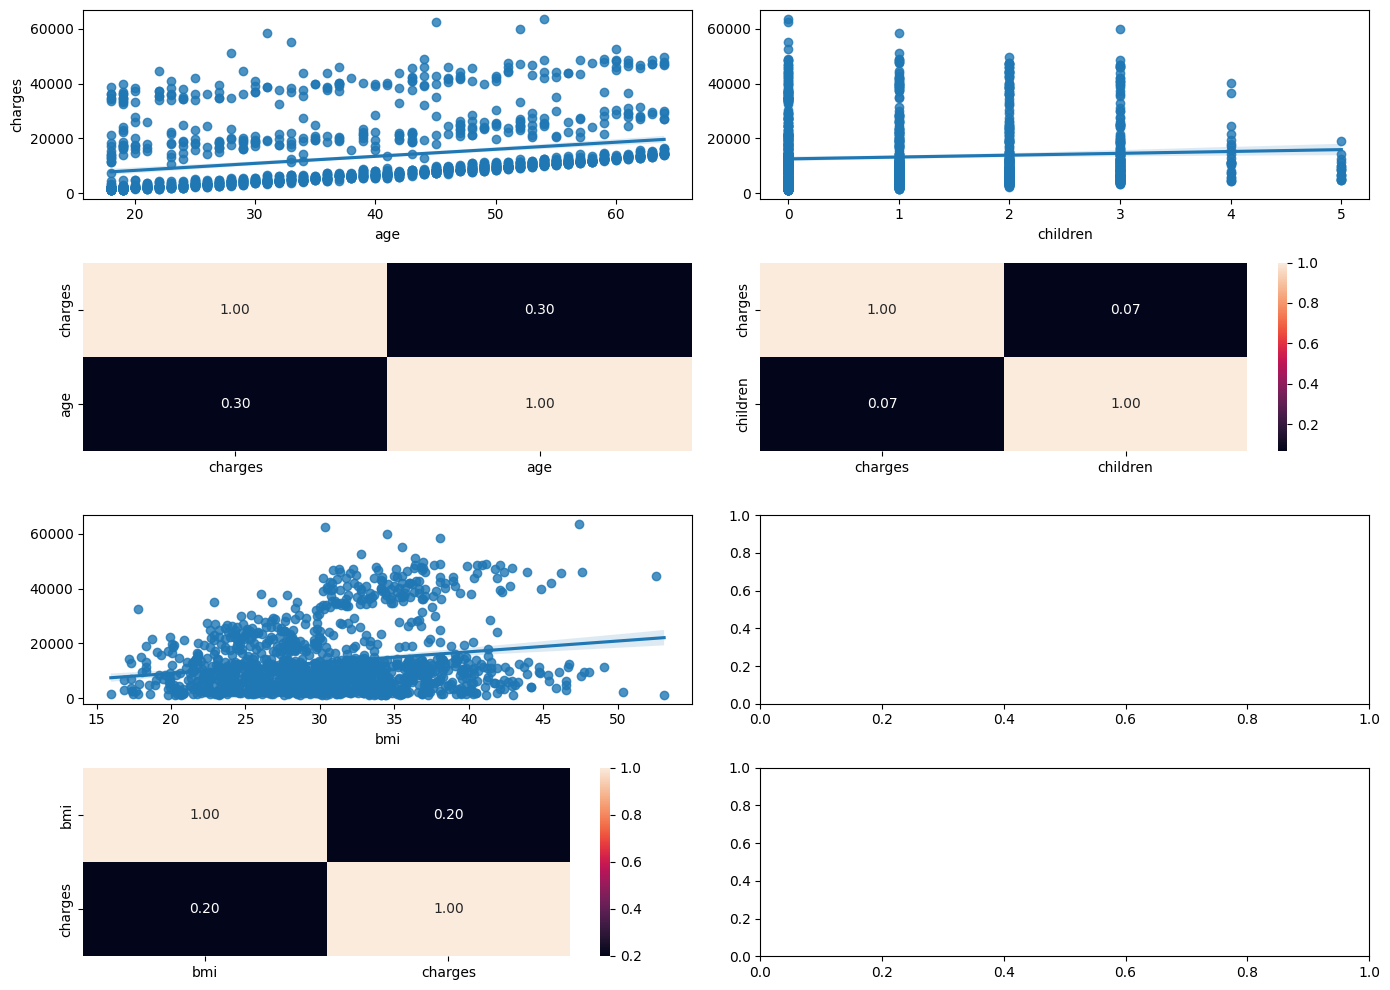

In [51]:
#ANÁLISIS MULTIVARIANTE
fig, axis = plt.subplots(4, 2, figsize = (14, 10))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])


plt.tight_layout()


plt.show()

Hay una correlación moderada entre el bmi y la edad con las primas, mientras que la correlación con con los hijos es bastante debil.

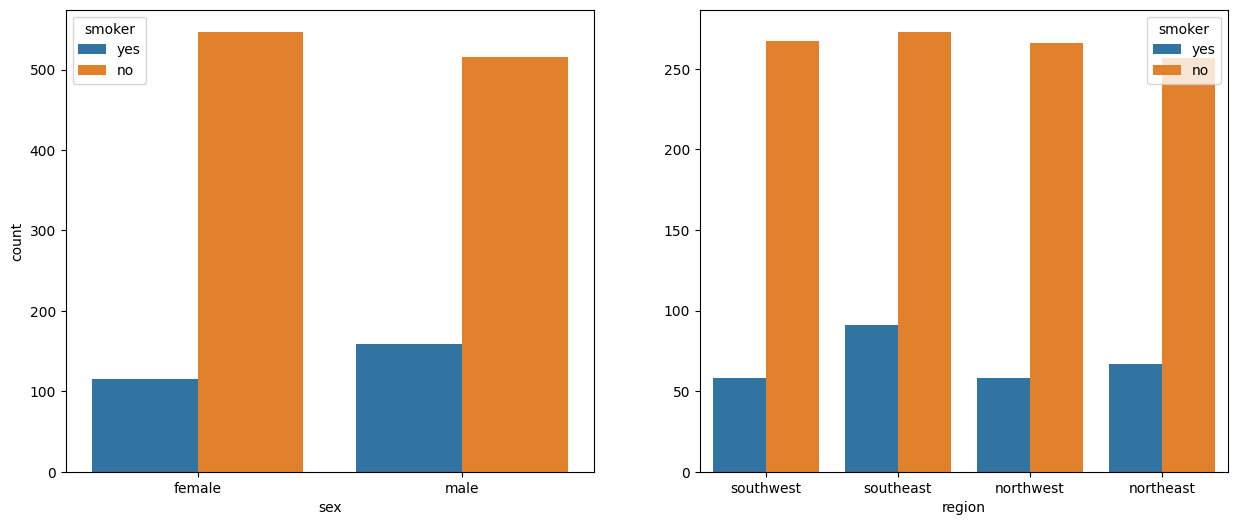

In [52]:
fig, axis = plt.subplots(1, 2, figsize = (15, 6))

sns.countplot(ax = axis[0], data = df, x = "sex", hue = "smoker")
sns.countplot(ax = axis[1], data = df, x = "region", hue = "smoker").set(ylabel = None)
plt.show()


Están bastente equilibradas las dos gráficas, se podría destacar un cierto despunte que personas que fuman en la región sudeste.

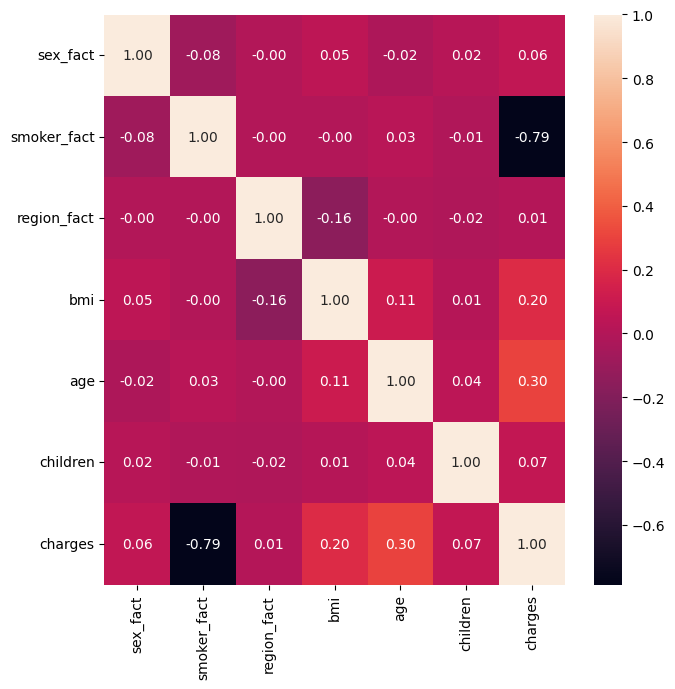

In [53]:
#ANÁLISIS DE CORRELACIONES

df["sex_fact"] = pd.factorize(df["sex"])[0]
df["smoker_fact"] = pd.factorize(df["smoker"])[0]
df["region_fact"] = pd.factorize(df["region"])[0]

fig, axis = plt.subplots(figsize = (7, 7))

sns.heatmap(df[["sex_fact", "smoker_fact", "region_fact", "bmi", "age", "children", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Lo más relevante que observo es que hay una correlacion alta negativa entre fumadores y charges, mientras que hay una correlación alta positiva entre la edad y charges y una moderada entre bmi y charges.

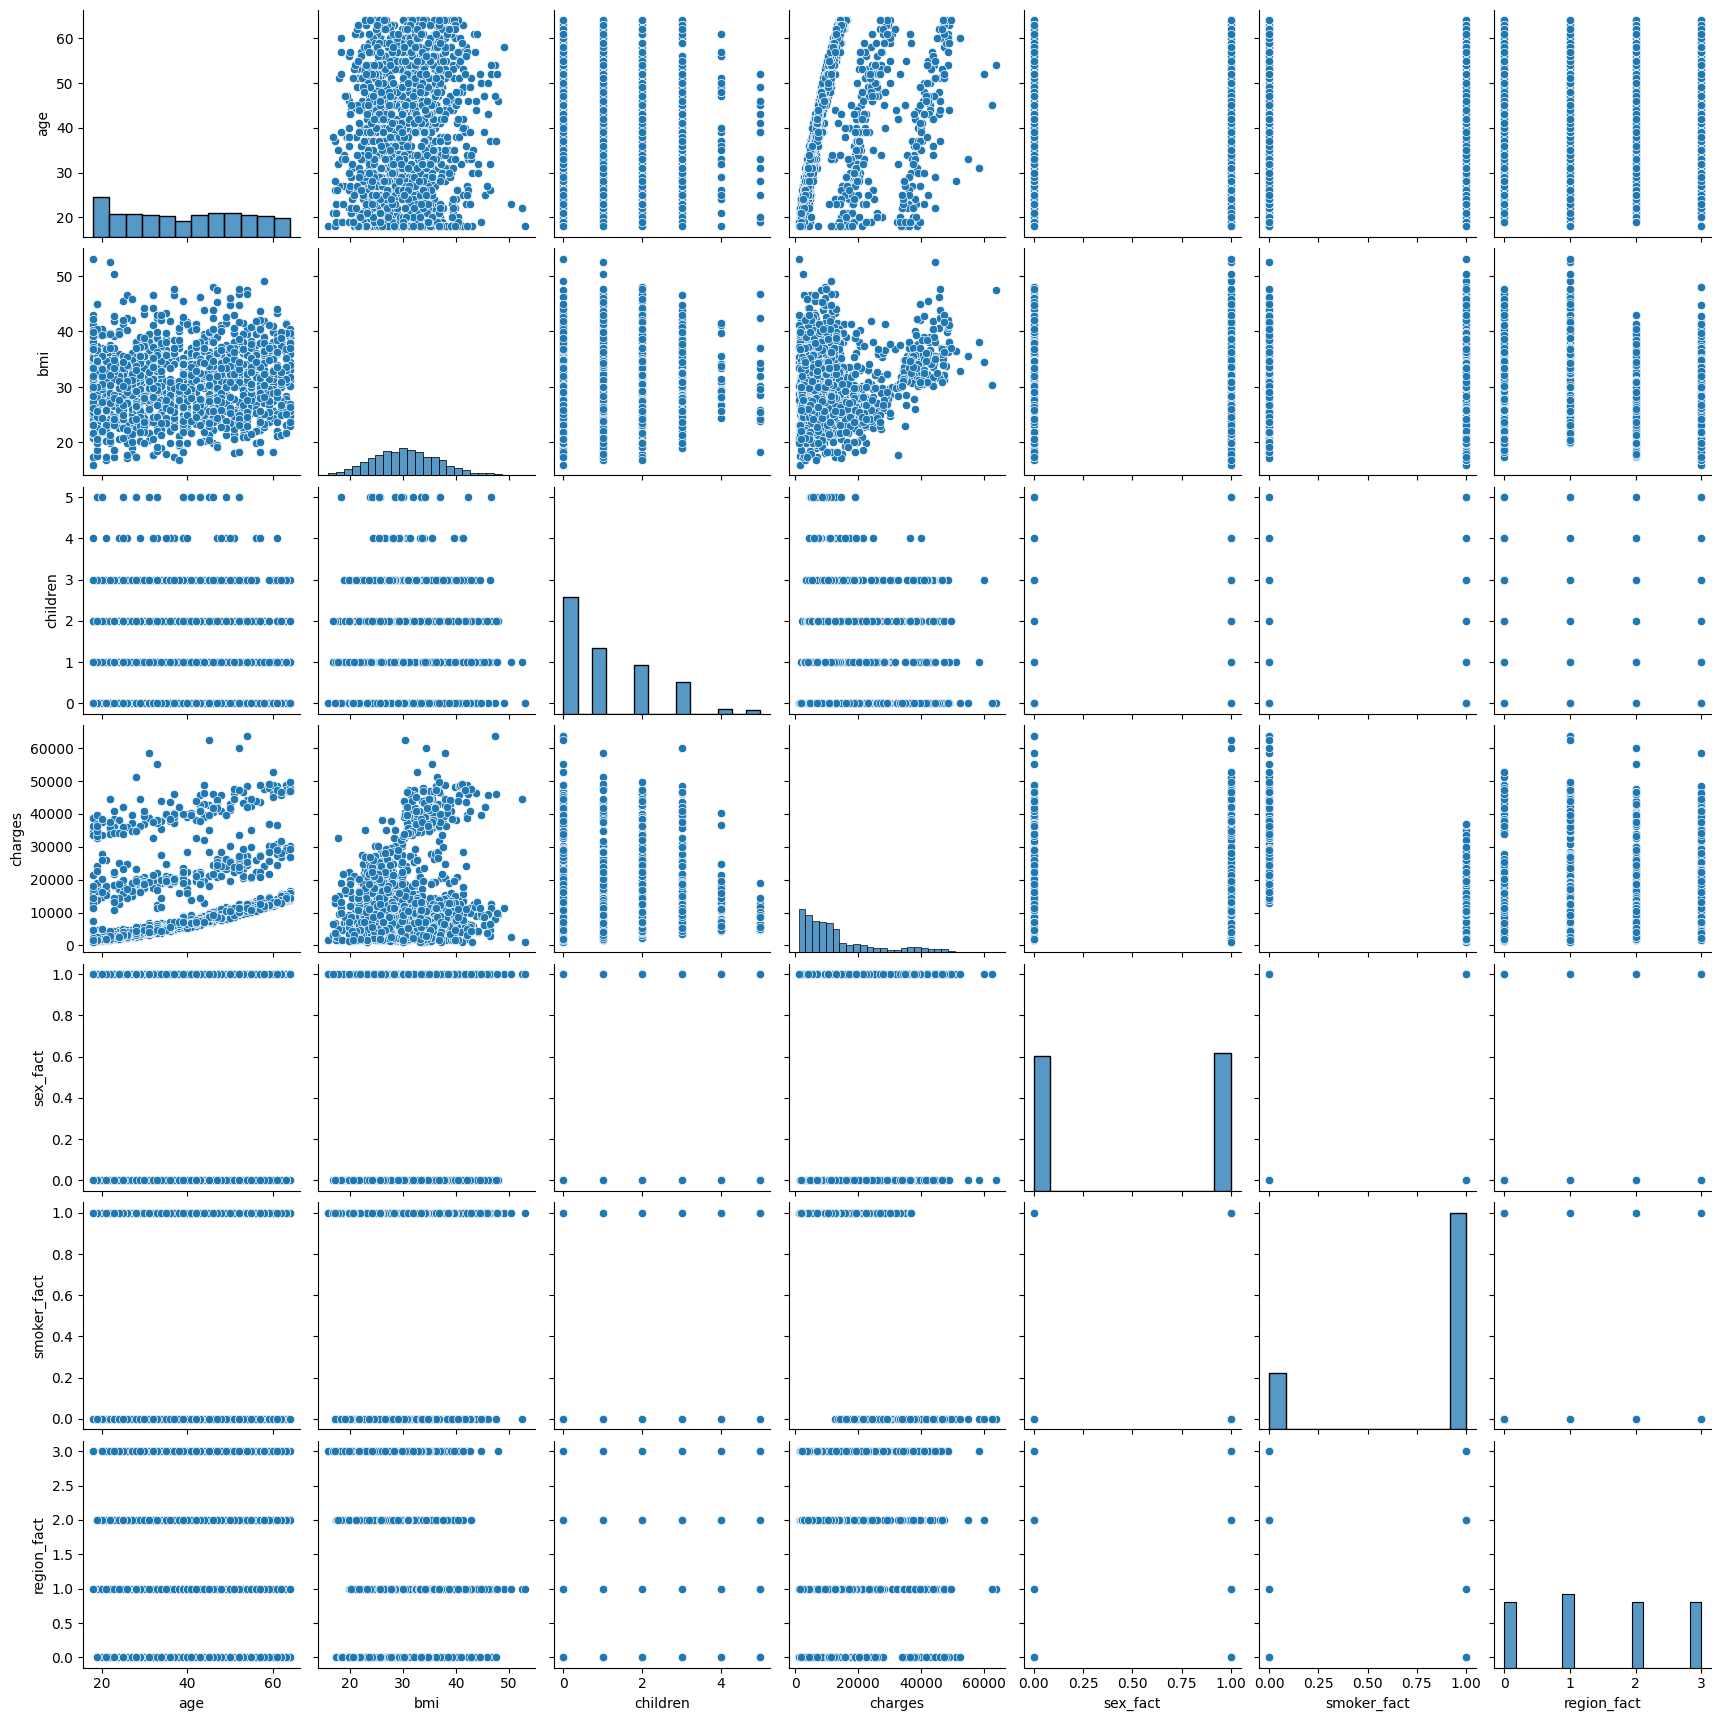

In [54]:
sns.pairplot(data = df)

In [55]:
df.describe().round(2)

,age,bmi,children,charges,sex_fact,smoker_fact,region_fact
count,1337.00,1337.00,1337.00,1337.00,1337.0,1337.0,1337.00
mean,39.22,30.66,1.10,13279.12,0.5,0.8,1.48
std,14.04,6.10,1.21,12110.36,0.5,0.4,1.11
min,18.00,15.96,0.00,1121.87,0.0,0.0,0.00
25%,27.00,26.29,0.00,4746.34,0.0,1.0,1.00
50%,39.00,30.40,1.00,9386.16,1.0,1.0,1.00
75%,51.00,34.70,2.00,16657.72,1.0,1.0,2.00
max,64.00,53.13,5.00,63770.43,1.0,1.0,3.00


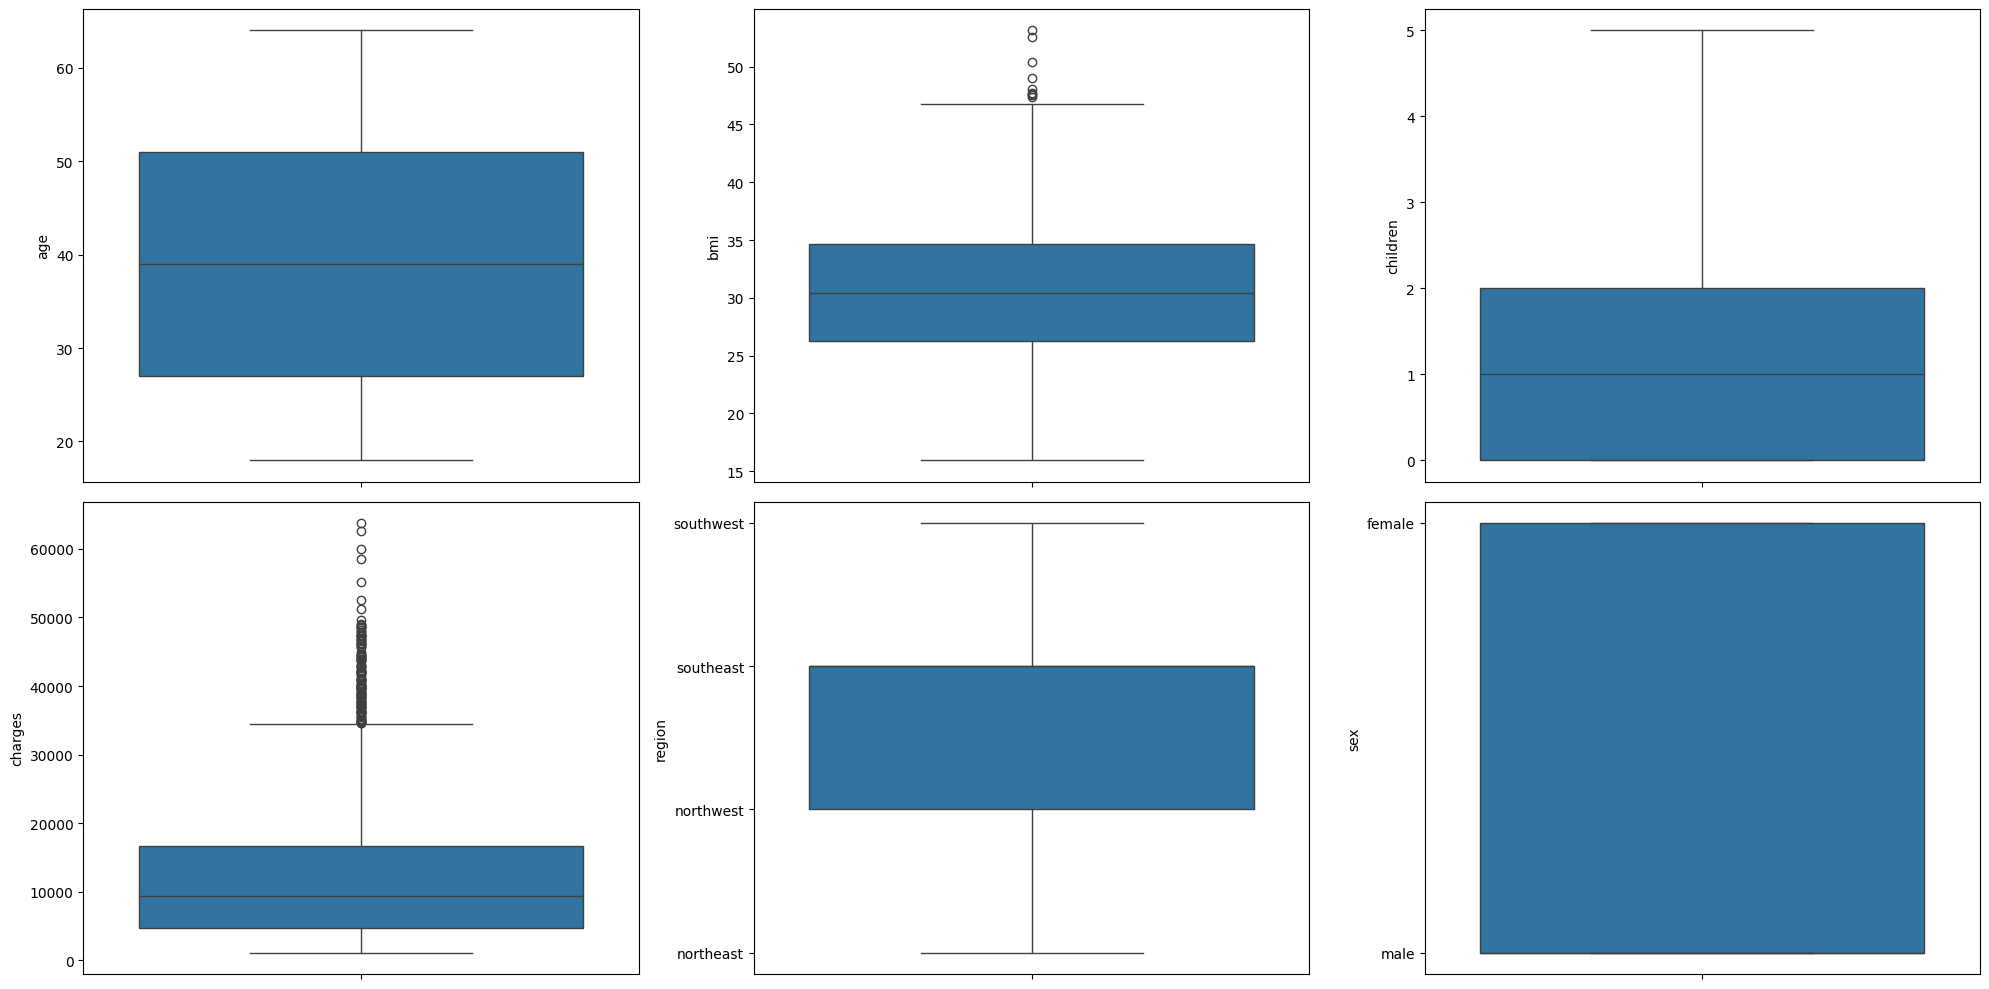

In [56]:
fig, axis = plt.subplots(2, 3, figsize = (20, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = df, y = "children")
sns.boxplot(ax = axis[1, 0], data = df, y = "charges")
sns.boxplot(ax = axis[1, 1], data = df, y = "region")
sns.boxplot(ax = axis[1, 2], data = df, y = "sex")

plt.tight_layout()

plt.show()

Econtramos valores atípicos en charges y bmi.

In [57]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 47.32 y 13.67, con un rango intercuartílico de 8.41


In [58]:
bmi_alto = df[df["bmi"] >= 47.5]

bmi_alto

,age,sex,bmi,children,smoker,region,charges,sex_fact,smoker_fact,region_fact
116,58,male,49.06,0,no,southeast,11381.3254,1,1,1
286,46,female,48.07,2,no,northeast,9432.9253,0,1,3
401,47,male,47.52,1,no,southeast,8083.9198,1,1,1
847,23,male,50.38,1,no,southeast,2438.0552,1,1,1
860,37,female,47.60,2,yes,southwest,46113.5110,0,0,0
1047,22,male,52.58,1,yes,southeast,44501.3982,1,0,1
1088,52,male,47.74,1,no,southeast,9748.9106,1,1,1
1317,18,male,53.13,0,no,southeast,1163.4627,1,1,1


Solo encontramos 8 datos por lo que los eliminamos.

In [59]:

upper_limit = 47.32
lower_limit = 13.67

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['bmi'] >= lower_limit) & (df['bmi'] <= upper_limit)]['bmi'].mean()

# Reemplazar outliers por la media
df['bmi'] = df['bmi'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [60]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 34524.78 y -13120.72, con un rango intercuartílico de 11911.37


In [61]:
charges_alto = df[df["charges"] >= 34489.35]

charges_alto

,age,sex,bmi,children,smoker,region,charges,sex_fact,smoker_fact,region_fact
14,27,male,42.130,0,yes,southeast,39611.75770,1,0,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,0,0
23,34,female,31.920,1,yes,northeast,37701.87680,0,0,3
29,31,male,36.300,2,yes,southwest,38711.00000,1,0,0
30,22,male,35.600,0,yes,southwest,35585.57600,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1301,62,male,30.875,3,yes,northwest,46718.16325,1,0,2
1303,43,male,27.800,0,yes,southwest,37829.72420,1,0,0
1313,19,female,34.700,2,yes,southwest,36397.57600,0,0,0


Estos datos serían un 10% del data set por lo que creo que no debería eliminarlos por que es una cantidad importante de datos y además se trata de la variable objetivo.

In [62]:
#VALORES FALTANTES

df.isnull().sum().sort_values(ascending=False)

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
sex_fact       0
smoker_fact    0
region_fact    0
dtype: int64

In [63]:
from sklearn.preprocessing import MinMaxScaler

df["sex_fact"] = pd.factorize(df["sex"])[0]
df["smoker_fact"] = pd.factorize(df["smoker"])[0]
df["region_fact"] = pd.factorize(df["region"])[0]
num_variables = ["age", "bmi", "children", "sex_fact", "smoker_fact", "region_fact"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])

total_data_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)

total_data_scal["charges"] = df["charges"]

total_data_scal.head()

,age,bmi,children,sex_fact,smoker_fact,region_fact,charges
0,0.021739,0.387788,0.0,0.0,0.0,0.000000,16884.92400
1,0.000000,0.578435,0.2,1.0,1.0,0.333333,1725.55230
2,0.217391,0.553426,0.6,1.0,1.0,0.333333,4449.46200
3,0.326087,0.219065,0.0,1.0,1.0,0.666667,21984.47061
4,0.304348,0.419617,0.0,1.0,1.0,0.666667,3866.85520


In [64]:
#SELECIÓN DE CARACTERÍSTICAS

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_fact
0,0.108696,0.277688,0.0,1.0
1,0.065217,0.317798,0.4,1.0
2,0.739130,0.700390,0.4,1.0
3,0.978261,0.828516,0.0,1.0
4,0.630435,0.345567,0.4,1.0


In [65]:
print(X_train.columns)



Index(['age', 'bmi', 'children', 'sex_fact', 'smoker_fact', 'region_fact'], dtype='object')


In [66]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [67]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_fact,charges
0,0.108696,0.277688,0.0,1.0,2396.09590
1,0.065217,0.317798,0.4,1.0,3279.86855
2,0.739130,0.700390,0.4,1.0,33471.97189
3,0.978261,0.828516,0.0,1.0,13405.39030
4,0.630435,0.345567,0.4,1.0,9715.84100


In [68]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regresión Lineal - Resultados:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R2): {r2}")

Regresión Lineal - Resultados:
Error Cuadrático Medio (MSE): 37194360.26236839
Coeficiente de Determinación (R2): 0.7975883927615613


In [70]:
y_pred = model.predict(X_test)
y_pred

array([ 7748.56998875,  5889.22865385, 14252.60107474, 31703.19750608,
        9408.36197438, 13587.79958024, 29920.10249034,  1627.73815426,
       10976.51848604, 11302.49772805, 10267.4521888 , 33080.03812472,
       30652.39919146, 17575.22852735, 10305.40533864,  9786.46535773,
        4435.35261388, 32144.33574086,  3483.65414887,  5577.70800671,
        3907.27221789, 29855.67161039, 15236.9136645 , 30686.74675724,
       30978.1616334 ,  5412.17432228, 35808.24284629, 36797.55965559,
       10913.0000765 , 13794.90219799,  6015.69041504, 13167.15448695,
         852.07877256, 12344.60799215, 34589.0990081 , 12499.47427229,
        4896.38741203,  3806.71037313, 31267.22840088,  9298.83497281,
        6573.48551913, 29572.80898739, 35180.60733151, 11893.41687188,
        7243.19697761,  3592.91714817,  5733.85811911,  9145.58718167,
        4164.05951736,  9460.83112069,  6945.71651012, 11694.92405774,
       30711.38644251,  4012.53481901, 11307.84985718, 10173.44530273,
      

He corregido los outliers del BMI y en vez de eliminarlos los he sustituido por la media y con eso y unas correcciones en el SelectkBest me ha subido la eficiencia hasta casi el 80%. 